<div class="image123">
    <div class="imgContainer">
        <img src="./logos/UNEnvironment.png" alt="UNEP logo" style="width:200px">
    </div>
    <div class="imgContainer">
        <img src="./logos/GI-REC.png" alt="GI_REC logo" style="width:200px">
    </div>
</div>

# Defining simple transition scenarios

UN Environment

In [1]:
import datetime; print(datetime.datetime.now())

2017-10-20 10:55:26.502616


**Notebook Abstract:**

The following notebook describes the process to construct simple transition scenarion.

In [2]:
from urbanmetabolism.population.model import reduce_consumption

In [3]:
iterations = 1000#00
typ = 'resampled'
model_name = 'Sorsogon_Electricity_Water_wbias_projected_dynamic_{}'.format(typ)
file_name = "data/survey_" + model_name + "_{}_{{}}.csv".format(iterations)

## Define simple population selection rules

In [4]:
sampling_rules = {
    "i_Education_cat == 'Education_Post_Secondary'": 20,
    "i_Education_cat == 'Education_College'":        20,
    "i_Education_cat == 'Education_Post_Graduate'":  20,
    "e_Urban == 'Urbanity_Urban'": 30,
    "Income >= 180000": 30
}

In [5]:
import numpy as np
def _growth_rate(start_rate, final_rate, as_array = True,
                 start = False, end = False,
                 #n_years = 21,
                 default_start = 2010,
                 default_end = 2030):
    if isinstance(start, bool):
        start = default_start
    if isinstance(end, bool):
        end = default_end
    
    i = start - default_start
    if i < 0: i = 0
    rate_years = end - start + 1
    j = default_end - start - end - start

    growth_rate = np.linspace(start_rate,  final_rate, num = rate_years)
    growth_rate = [0]*i + [i for i in growth_rate] + [final_rate]*j
    if as_array:
        growth_rate = np.asarray(growth_rate)
    return(growth_rate)

In [6]:
import matplotlib.pyplot as plt
def plot_growth_rate(Elec, Water, pr, name):
    fig, ax = plt.subplots()
    years = [int(i) for i in range(2010, 2031)]
    ax.plot(years, pr, label="Technology penetration rate")
    bm = years.index(2016)
    ax.set_xticks(years);
    ax.set_xticklabels(years, rotation=90);
    ax.plot(years, Elec, label='Electricity efficiency increase rate');
    ax.plot(years, Water, label='Water efficiency increase rate');
    ax.vlines(2016, 0, np.max([pr[6], Elec[6], Water[6]]), 'r',
              linestyles='dashed', alpha=0.4, label='Benchmark year')
    ax.set_ylim(0,1)
    ax.set_title("Technology transition rates for {}".format(name))
    ax.set_ylabel("Transition rate")
    ax.legend();
    plt.savefig('FIGURES/transition_rates_{}.png'.format(name), dpi=300)

In [7]:
Elec  = _growth_rate(0.1 , 0.8 )
Water = _growth_rate(0.05, 0.2 )
pr    = _growth_rate(0.1 , 0.6, start=2016)

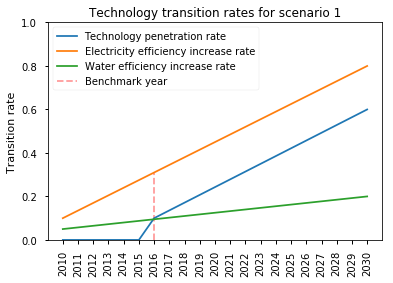

In [8]:
plot_growth_rate(Elec, Water, pr, 'scenario 1')

In [9]:
for y, pr, elec, wat in zip(range(2010, 2031), pr, Elec, Water):
    reduction = {'Electricity':elec, 'Water':wat}
    _ = reduce_consumption(file_name, y, pr, sampling_rules, reduction,
                              scenario_name = "scenario 1")

00.00%   Electricity   reduction; efficiency rate 10.00%; year 2010 and penetration rate 00.00
00.00%      Water      reduction; efficiency rate 05.00%; year 2010 and penetration rate 00.00
00.00%   Electricity   reduction; efficiency rate 13.50%; year 2011 and penetration rate 00.00
00.00%      Water      reduction; efficiency rate 05.75%; year 2011 and penetration rate 00.00
00.00%   Electricity   reduction; efficiency rate 17.00%; year 2012 and penetration rate 00.00
00.00%      Water      reduction; efficiency rate 06.50%; year 2012 and penetration rate 00.00
00.00%   Electricity   reduction; efficiency rate 20.50%; year 2013 and penetration rate 00.00
00.00%      Water      reduction; efficiency rate 07.25%; year 2013 and penetration rate 00.00
00.00%   Electricity   reduction; efficiency rate 24.00%; year 2014 and penetration rate 00.00
00.00%      Water      reduction; efficiency rate 08.00%; year 2014 and penetration rate 00.00
00.00%   Electricity   reduction; efficiency rate 

In [10]:
Elec  = _growth_rate(0.1 , 0.9 )
Water = _growth_rate(0.05, 0.7 )
pr    = _growth_rate(0.1 , 0.8, start=2016)

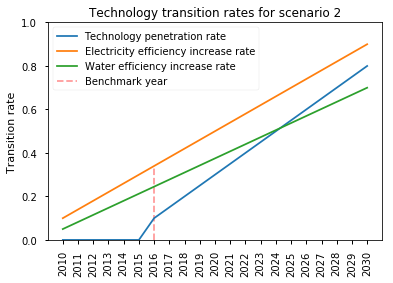

In [11]:
plot_growth_rate(Elec, Water, pr, 'scenario 2')

In [12]:
for y, pr, elec, wat in zip(range(2010, 2031), pr, Elec, Water):
    reduction = {'Electricity':elec, 'Water':wat}
    _ = reduce_consumption(file_name, y, pr, sampling_rules, reduction,
                              scenario_name = "scenario 2")

00.00%   Electricity   reduction; efficiency rate 10.00%; year 2010 and penetration rate 00.00
00.00%      Water      reduction; efficiency rate 05.00%; year 2010 and penetration rate 00.00
00.00%   Electricity   reduction; efficiency rate 14.00%; year 2011 and penetration rate 00.00
00.00%      Water      reduction; efficiency rate 08.25%; year 2011 and penetration rate 00.00
00.00%   Electricity   reduction; efficiency rate 18.00%; year 2012 and penetration rate 00.00
00.00%      Water      reduction; efficiency rate 11.50%; year 2012 and penetration rate 00.00
00.00%   Electricity   reduction; efficiency rate 22.00%; year 2013 and penetration rate 00.00
00.00%      Water      reduction; efficiency rate 14.75%; year 2013 and penetration rate 00.00
00.00%   Electricity   reduction; efficiency rate 26.00%; year 2014 and penetration rate 00.00
00.00%      Water      reduction; efficiency rate 18.00%; year 2014 and penetration rate 00.00
00.00%   Electricity   reduction; efficiency rate 